# Medical Insurance Cost Prediction

## Importing the dependencies

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")
import pickle

## Loading the dataset

In [2]:
df = pd.read_csv("medical_insurance.csv")

In [3]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Analyzing the dataset

### Shape of dataset

In [4]:
df.shape

(1338, 7)

#### The dataset has 1338 rows and 7 columns

### Descriptive Statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### The dataset has 3 categorical features : gender, smoker, region

### Checking for missing values

In [6]:
df.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### As we can clearly see, there are no missing values

### Data Distribution

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Visualizing the distribution of data across features

#### Age

<Figure size 600x600 with 0 Axes>

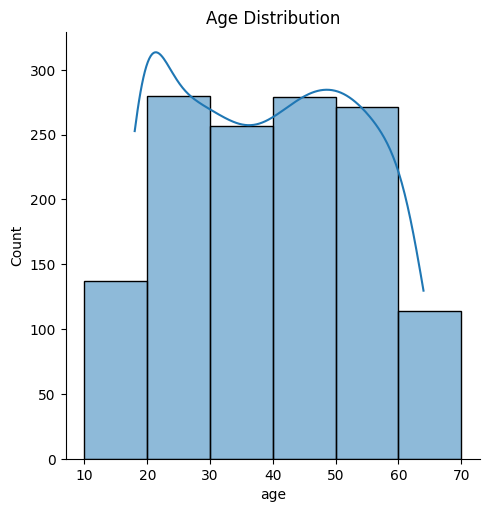

In [8]:
age_bins = [10,20,30,40,50,60,70]
plt.figure(figsize=(6,6))
sns.displot(df['age'], bins= age_bins,  kde = True)
plt.title('Age Distribution')
plt.show()

#### Gender

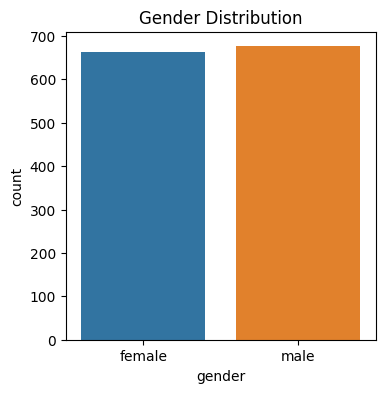

In [9]:
plt.figure(figsize=(4,4))
sns.countplot(x='gender', data=df, hue = "gender")
plt.title('Gender Distribution')
plt.show()

In [10]:
df["gender"].value_counts()

gender
male      676
female    662
Name: count, dtype: int64

#### There are slightly more number of males as compared to females

#### BMI

<Figure size 400x400 with 0 Axes>

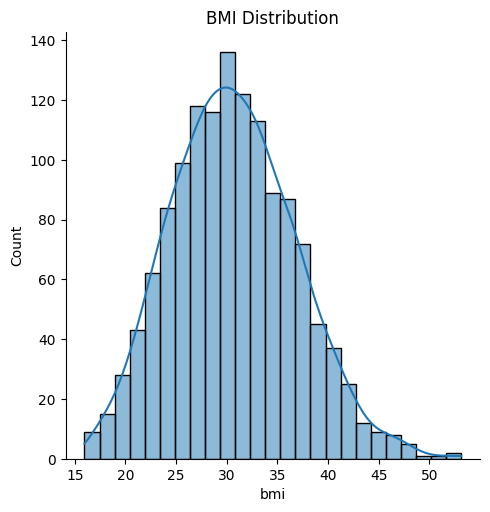

In [11]:
plt.figure(figsize=(4,4))
sns.displot(df['bmi'], kde = True)
plt.title('BMI Distribution')
plt.show()

#### From the above chart, the distribution of bmi looks right skewed

#### # of children

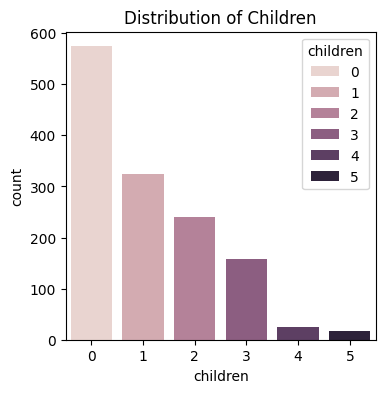

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(x='children', data=df, hue="children")
plt.title('Distribution of Children')
plt.show()

In [13]:
df["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

#### There are a significantly higher number of people having less than 3 children

#### Smoker

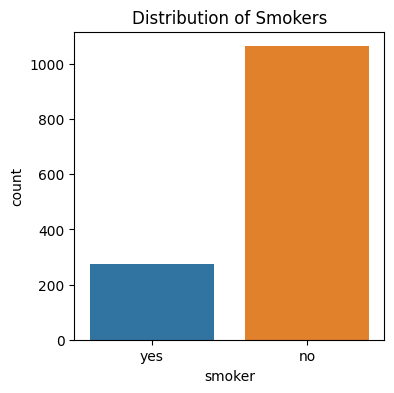

In [14]:
plt.figure(figsize=(4,4))
sns.countplot(x='smoker', data=df, hue="smoker")
plt.title('Distribution of Smokers')
plt.show()

In [15]:
df["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

#### A higher majority of people are non-smokers

#### Region

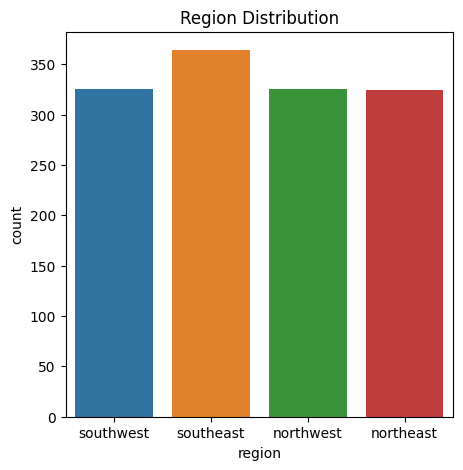

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=df, hue="region")
plt.title('Region Distribution')
plt.show()

In [17]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

#### Charges

<Figure size 600x600 with 0 Axes>

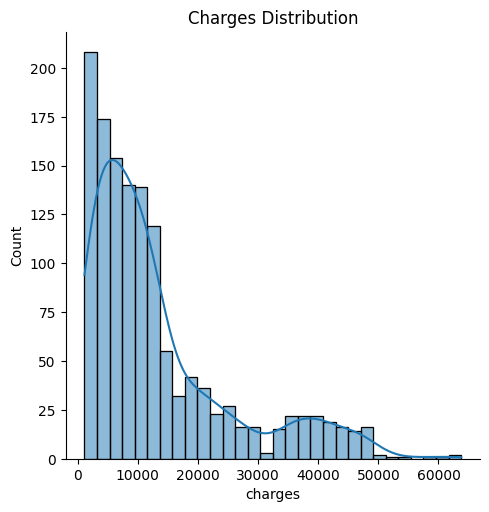

In [18]:
plt.figure(figsize=(6,6))
sns.displot(df['charges'], kde = True)
plt.title('Charges Distribution')
plt.show()

## Data Preprocessing

### Creating new features

In [19]:
age_groups = []

for age in df['age']:
    if age <= 18:
        age_groups.append('child')
    elif 19 <= age <= 60:
        age_groups.append('adult')
    else:
        age_groups.append('older')

df['age_group'] = age_groups

df.head()

,age,gender,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,adult
1,18,male,33.770,1,no,southeast,1725.55230,child
2,28,male,33.000,3,no,southeast,4449.46200,adult
3,33,male,22.705,0,no,northwest,21984.47061,adult
4,32,male,28.880,0,no,northwest,3866.85520,adult


In [20]:
bmi_categories = []

for bmi in df['bmi']:
    if bmi < 18.5:
        bmi_categories.append('underweight')
    elif 18.5 <= bmi < 25:
        bmi_categories.append('normal')
    elif 25 <= bmi < 30:
        bmi_categories.append('overweight')
    else:
        bmi_categories.append('obesity')

df['bmi_category'] = bmi_categories

df.head()

,age,gender,bmi,children,smoker,region,charges,age_group,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,adult,overweight
1,18,male,33.770,1,no,southeast,1725.55230,child,obesity
2,28,male,33.000,3,no,southeast,4449.46200,adult,obesity
3,33,male,22.705,0,no,northwest,21984.47061,adult,normal
4,32,male,28.880,0,no,northwest,3866.85520,adult,overweight


### Encoding categorical features

In [21]:
le = LabelEncoder()
df.head()

,age,gender,bmi,children,smoker,region,charges,age_group,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,adult,overweight
1,18,male,33.770,1,no,southeast,1725.55230,child,obesity
2,28,male,33.000,3,no,southeast,4449.46200,adult,obesity
3,33,male,22.705,0,no,northwest,21984.47061,adult,normal
4,32,male,28.880,0,no,northwest,3866.85520,adult,overweight


In [22]:
df["gender"] = le.fit_transform(df["gender"])

#### male : 1, female : 0

In [23]:
df["smoker"] = le.fit_transform(df["smoker"])

#### yes : 1, no : 0

In [24]:
regions = {'southeast':0,'southwest':1,'northeast':2,'northwest':3}
df["region"] = df["region"].map(regions)

In [25]:
age_grp = {'child':0,'adult':1,'older':2}
df["age_group"] = df["age_group"].map(age_grp)

In [26]:
bmi_grp = {'underweight':0,'normal':1,'overweight':2,'obesity':3}
df["bmi_category"] = df["bmi_category"].map(bmi_grp)

In [27]:
df.head()

,age,gender,bmi,children,smoker,region,charges,age_group,bmi_category
0,19,0,27.900,0,1,1,16884.92400,1,2
1,18,1,33.770,1,0,0,1725.55230,0,3
2,28,1,33.000,3,0,0,4449.46200,1,3
3,33,1,22.705,0,0,3,21984.47061,1,1
4,32,1,28.880,0,0,3,3866.85520,1,2


#### As we can see all the categorical values have been encoded

### Rearranging the columns

In [28]:
charges = df.pop("charges")

df.head()

,age,gender,bmi,children,smoker,region,age_group,bmi_category
0,19,0,27.900,0,1,1,1,2
1,18,1,33.770,1,0,0,0,3
2,28,1,33.000,3,0,0,1,3
3,33,1,22.705,0,0,3,1,1
4,32,1,28.880,0,0,3,1,2


In [29]:
df["charges"] = charges 

## Separating the Features and Target

In [30]:
X = df.iloc[:, 0:8]
y = df["charges"]

In [31]:
X.head()

,age,gender,bmi,children,smoker,region,age_group,bmi_category
0,19,0,27.900,0,1,1,1,2
1,18,1,33.770,1,0,0,0,3
2,28,1,33.000,3,0,0,1,3
3,33,1,22.705,0,0,3,1,1
4,32,1,28.880,0,0,3,1,2


In [32]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

## Train-Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [34]:
X_train.shape

(1070, 8)

In [35]:
X_test.shape

(268, 8)

## Model Training

### Linear Regression

#### Model Fitting

In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### Prediction

In [37]:
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

#### Model Evaluation

##### Accuracy 

In [38]:
training_accuracy = lr.score(X_train, y_train)
testing_accuracy = lr.score(X_test, y_test)

print(f"Training data accuracy : {round((training_accuracy*100), 2)}%")
print(f"Testing data accuracy : {round((testing_accuracy*100), 2)}%")

Training data accuracy : 74.44%
Testing data accuracy : 77.95%


##### Error Evaluation

In [39]:
lr_mae_train = mean_absolute_error(y_train, lr_train_pred)
lr_mae_test = mean_absolute_error(y_test, lr_test_pred)

print(f"Linear Regression MAE on Training Data: {lr_mae_train}")
print(f"Linear Regression MAE on Testing Data: {lr_mae_test}")

Linear Regression MAE on Training Data: 4321.109276264864
Linear Regression MAE on Testing Data: 4247.615870459906


##### Error Percentage

In [40]:
max_value = y.max()

train_error = round((lr_mae_train / max_value) * 100, 2)
print(f"Error % on Training data : {train_error}% ")

test_error = round((lr_mae_test / max_value) * 100, 2)
print(f"Error % on Testing data : {test_error}% ")

Error % on Training data : 6.78% 
Error % on Testing data : 6.66% 


### Polynomial Regression

#### Model Fitting

In [41]:
polyreg = PolynomialFeatures(degree=3)
X_train_poly = polyreg.fit_transform(X_train)
X_test_poly = polyreg.transform(X_test)

In [42]:
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)

LinearRegression()

#### Prediction

In [43]:
poly_train_pred = poly_lr.predict(X_train_poly)
poly_test_pred = poly_lr.predict(X_test_poly)

#### Model Evaluation

##### Accuracy

In [44]:
training_accuracy = poly_lr.score(X_train_poly, y_train)
testing_accuracy = poly_lr.score(X_test_poly, y_test)

print(f"Training data accuracy : {round((training_accuracy*100), 2)}%")
print(f"Testing data accuracy : {round((testing_accuracy*100), 2)}%")

Training data accuracy : 87.72%
Testing data accuracy : 87.76%


#### Error Evaluation

In [45]:
poly_mae_train = mean_absolute_error(y_train, poly_train_pred)
poly_mae_test = mean_absolute_error(y_test, poly_test_pred)

print(f"Polynomial Regression MAE on Training Data: {poly_mae_train}")
print(f"Polynomial Regression MAE on Testing Data: {poly_mae_test}")

Polynomial Regression MAE on Training Data: 2367.490766042543
Polynomial Regression MAE on Testing Data: 2651.9383538742377


#### Error Percentage

In [46]:
max_value = y.max()

train_error = round((poly_mae_train / max_value) * 100, 2)
print(f"Error % on Training data : {train_error}% ")

test_error = round((poly_mae_test / max_value) * 100, 2)
print(f"Error % on Testing data : {test_error}% ")

Error % on Training data : 3.71% 
Error % on Testing data : 4.16% 


### Observation

#### Polynomial Regression outperforms Linear Regression in both accuracy and error percentages. It shows better model fitting and lower prediction errors which indicating that it captures the underlying relationship in the data more effectively

#### Polynomial Regression is the better model

## Dynamic Prediction Module

In [48]:
input_data = (32,	1,	28.880,	0,	0,	3,	1,	2)  

poly_input_data = polyreg.transform(np.array(input_data).reshape(1, -1))

prediction = poly_lr.predict(poly_input_data)

print(f'The insurance cost is USD {round(prediction[0], 2)}')

The insurance cost is USD 4497.66


## Saving the model

In [50]:
pickle.dump(polyreg, open("Polynomial Features.pkl", "wb"))
pickle.dump(poly_lr, open("Polynomial Regression.pkl", "wb"))
print("Model and features saved successfully.")

Model and features saved successfully.
